In [1]:
import pandas as pd
import datetime
import re
pd.set_option('display.max_columns', None, 'display.max_colwidth', 500)
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TechCrunchcontinentalUSA.csv')

In [3]:
df.head()

,permalink,company,numEmps,category,city,state,fundedDate,raisedAmt,raisedCurrency,round
0,lifelock,LifeLock,NaN,web,Tempe,AZ,1-May-07,6850000,USD,b
1,lifelock,LifeLock,NaN,web,Tempe,AZ,1-Oct-06,6000000,USD,a
2,lifelock,LifeLock,NaN,web,Tempe,AZ,1-Jan-08,25000000,USD,c
3,mycityfaces,MyCityFaces,7.0,web,Scottsdale,AZ,1-Jan-08,50000,USD,seed
4,flypaper,Flypaper,NaN,web,Phoenix,AZ,1-Feb-08,3000000,USD,a


In [4]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [5]:
df_highest = df.sort_values(by = 'raisedAmt', ascending = False).head(10)
df_highest

,permalink,company,numEmps,category,city,state,fundedDate,raisedAmt,raisedCurrency,round
1104,zenimax,ZeniMax,NaN,web,Rockville,MD,1-Oct-07,300000000,USD,a
14,facebook,Facebook,450.0,web,Palo Alto,CA,1-Oct-07,300000000,USD,c
923,kayak,Kayak,58.0,web,Norwalk,CT,1-Dec-07,196000000,USD,d
579,oversee,OverSee,150.0,web,Los Angeles,CA,1-Jan-08,150000000,USD,a
804,vmware,VMware,5000.0,NaN,Palo Alto,CA,30-Jul-07,150000000,USD,unattributed
708,esolar,eSolar,10.0,hardware,Pasadena,CA,21-Apr-08,130000000,USD,b
374,demandmedia,Demand Media,NaN,web,Santa Monica,CA,1-May-06,120000000,USD,a
317,eharmony,eHarmony,NaN,web,Pasadena,CA,1-Nov-04,110000000,USD,b
877,plastic-logic,Plastic Logic,NaN,hardware,Mountain View,CA,6-Jan-07,100000000,USD,d
375,demandmedia,Demand Media,NaN,web,Santa Monica,CA,1-Sep-06,100000000,USD,b


In [6]:
def get_color(raisedAmt):
    if raisedAmt > 200000000:
        return 'red'
    else:
        return 'grey'

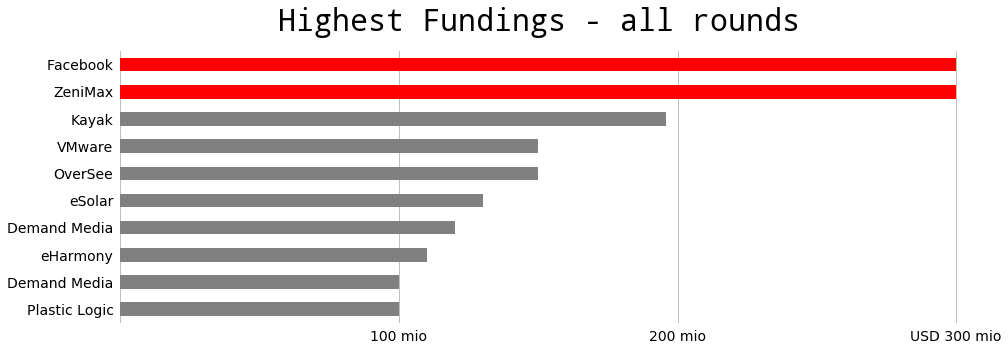

In [7]:
bar_colors = [get_color(raised) for raised in df_highest.raisedAmt]
bar_colors = bar_colors[::-1]
ax = df_highest.sort_values(by='raisedAmt').plot(fontsize = 14, kind='barh', y = 'raisedAmt', x = 'company', figsize=(15,5), color=bar_colors, legend=False)
ax.set_title('Highest Fundings - all rounds', pad=20)
ax.title.set_fontsize(30)
ax.title.set_fontname("Noto Mono")
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='both', left=False, bottom=False)
ax.yaxis.label.set_visible(False)
ax.set_xticks([0, 100000000, 200000000, 300000000])
ax.set_xticklabels(['', '100 mio', '200 mio', 'USD 300 mio'])
ax.grid(True, axis ='x')
ax.set_axisbelow(True)
ax.set_xlim(0,300500000)
plt.savefig('bars.pdf')

In [8]:
df.groupby('state').raisedAmt.sum().sort_values()

state
LA         25000
IA        225000
RI        500000
ND        570000
MN        600000
ME       1095000
ID       5500000
MO       6250000
NM       6500000
MI      10000000
TN      21500000
OH      22000000
IN      23200000
NE      27400000
AZ      50523750
PA      53925000
GA      58660000
DC      93710000
IL     112920000
CO     126470000
OR     138400000
NJ     141700000
UT     153080000
NC     154200000
TX     220125000
CT     232645000
VA     266400000
FL     305818000
MD     351750000
WA     789590000
NY     890185000
MA    1165120000
CA    9361385000
Name: raisedAmt, dtype: int64

In [9]:
label = []
for state in df.state:
    if df[df['state'] == state].raisedAmt.sum() > 266300000:
        label.append(state)
label = list(set(label))
single_states = label
label.append('other')


In [10]:
sum_ = []
for state in label:
    if state != 'other':
        sum_.append(df[df['state'] == state].raisedAmt.sum())
    else:
        sum_.append(df[~df.state.isin(single_states)].raisedAmt.sum())

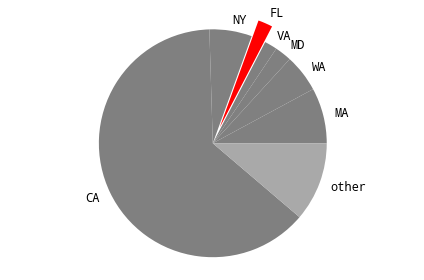

In [13]:
colors = ['grey', 'grey', 'grey', 'grey', 'red', 'grey', 'grey', 'darkgrey']

# Create a pie chart
plt.pie(
    sum_,
    labels=label,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0.15,0, 0, 0),
    startangle=0,
    radius = 1,
    wedgeprops = {'linewidth': 5},
    textprops = {'fontsize':12, 'fontname':'Noto Mono'}
    )
#plt.pie?
plt.axis('equal')
plt.tight_layout()
plt.savefig('pie.pdf')
plt.show()


## --------------------------------------------------------------
## About this project:
I wanted to do something else, but unfortunately the other data set was extremely hard/slow to scrape. Therefore, I downloaded the Techcrunch data set about startup fundings in the US and used it for my analysis. The data was very tidy and clean already. 

In a first step, I plotted the highest funded companies in the data set in a bar chart. My second step was to look at where the companies are located that received funding. I created a pie chart, grouped by state (and marked Florida, because, why not.)

## Further steps / nice to have:
It'd be cool to have an updated spreadsheet with current funding rounds. The data is rather outdated. As for further analysis, I would like to compare different funding rounds and look for trends there.
